In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('stock_market_bubble.csv')

In [3]:

# Basic info
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        10000 non-null  object 
 1   Price       10000 non-null  float64
 2   Volume      10000 non-null  float64
 3   Volatility  10000 non-null  float64
 4   Bubble      10000 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 390.8+ KB
None
              Price        Volume    Volatility        Bubble
count  1.000000e+04  10000.000000  10000.000000  10000.000000
mean   1.232145e+22   5470.141946      0.029989      0.053600
std    6.570596e+22   2582.804627      0.011556      0.225238
min    8.697331e+01   1000.607479      0.010000      0.000000
25%    7.363127e+07   3232.213285      0.020019      0.000000
50%    3.957901e+12   5470.430362      0.030026      0.000000
75%    1.056897e+18   7672.810132      0.039956      0.000000
max    7.619833e+23   9997.588759      0.

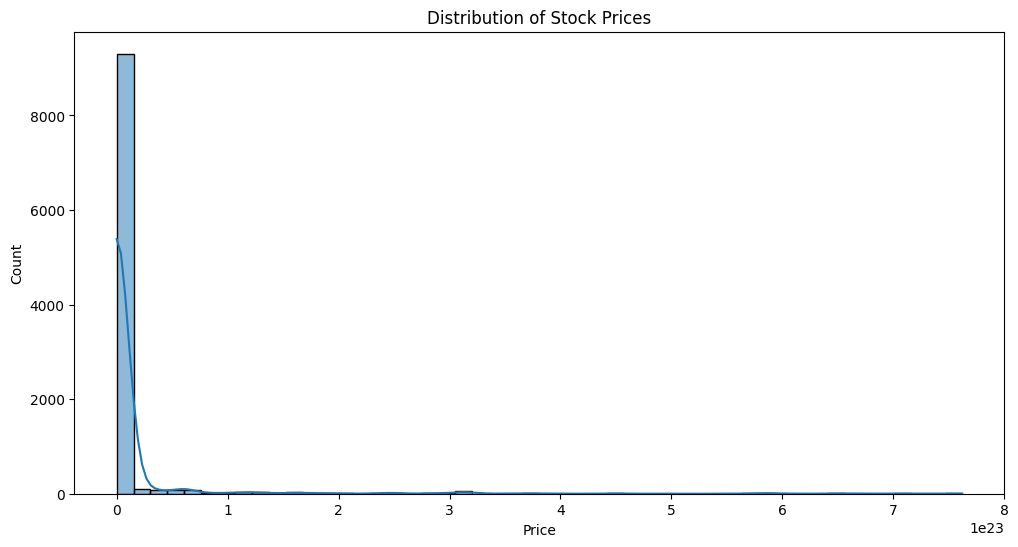

In [4]:
# Distribution of stock prices
plt.figure(figsize=(12, 6))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title('Distribution of Stock Prices')
plt.show()

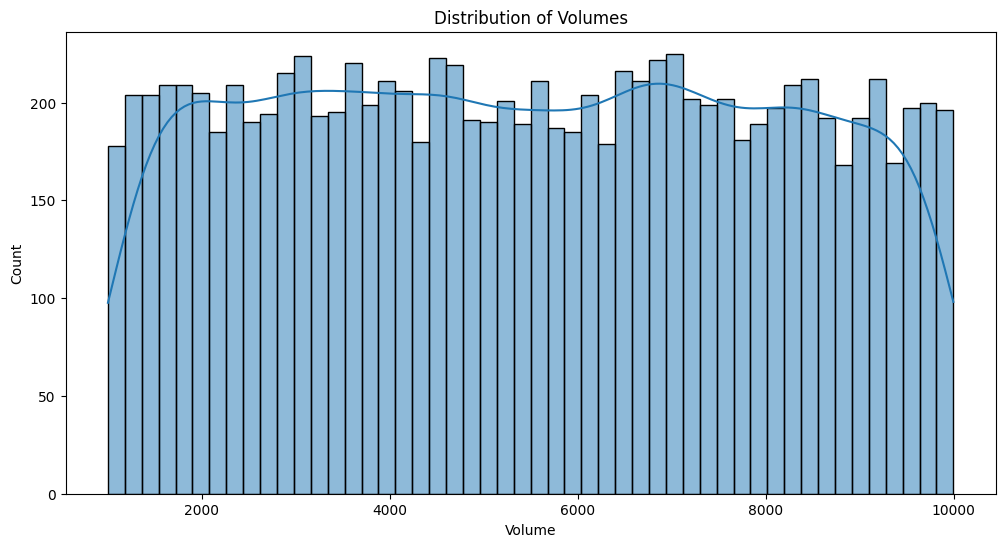

In [5]:
# Distribution of volumes
plt.figure(figsize=(12, 6))
sns.histplot(data['Volume'], bins=50, kde=True)
plt.title('Distribution of Volumes')
plt.show()

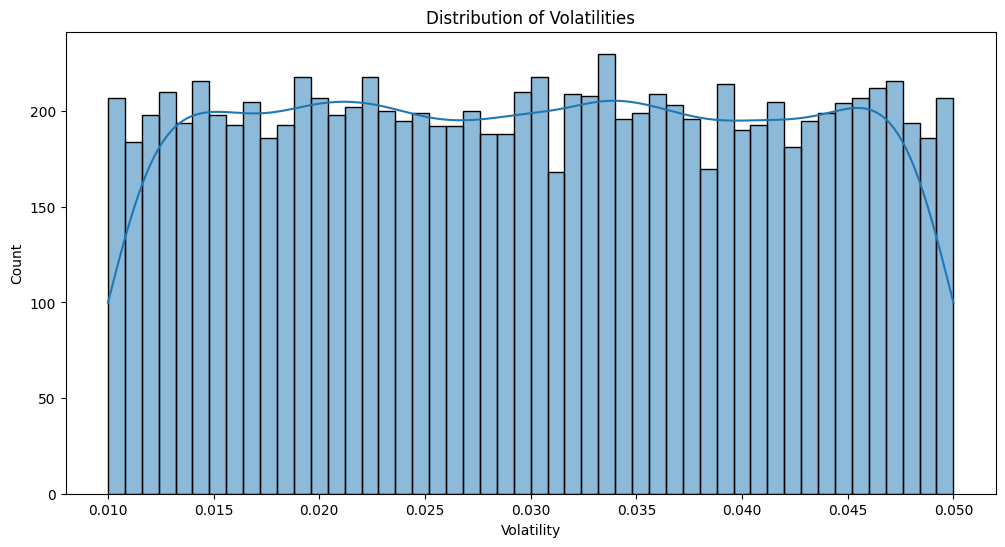

In [7]:
# Distribution of volatilities
plt.figure(figsize=(12, 6))
sns.histplot(data['Volatility'], bins=50, kde=True)
plt.title('Distribution of Volatilities')
plt.show()

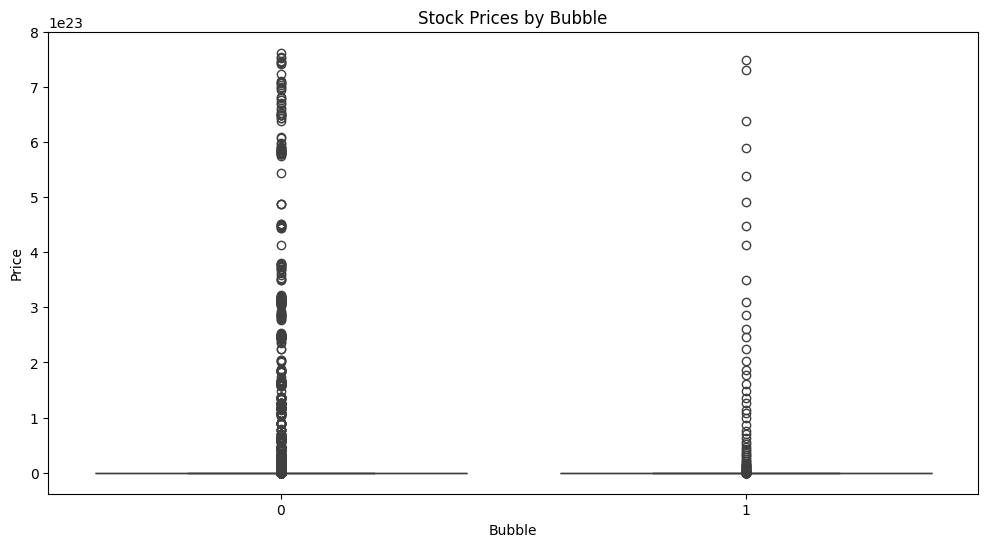

In [8]:
# Bubble vs non-bubble prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='Bubble', y='Price', data=data)
plt.title('Stock Prices by Bubble')
plt.show()

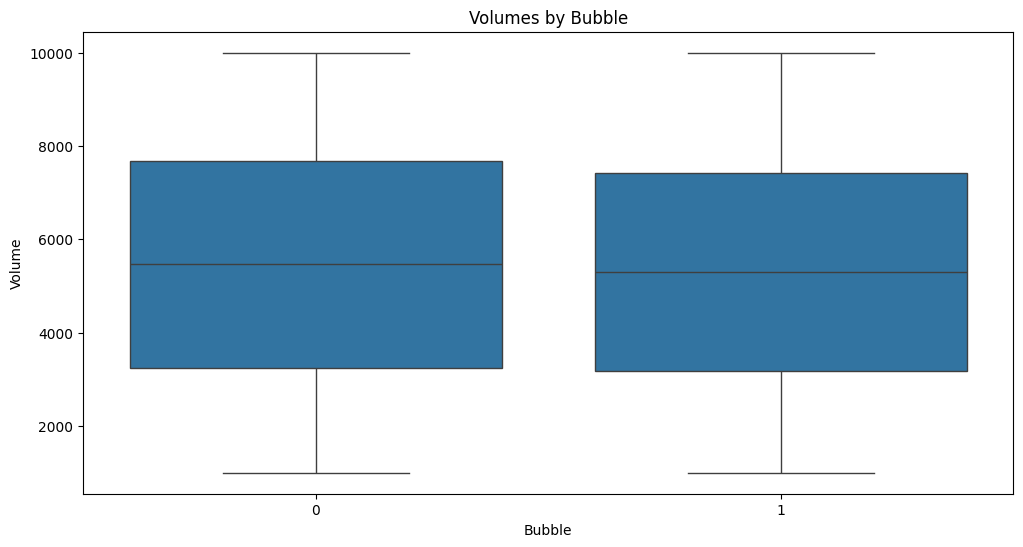

In [9]:
# Bubble vs non-bubble volumes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Bubble', y='Volume', data=data)
plt.title('Volumes by Bubble')
plt.show()


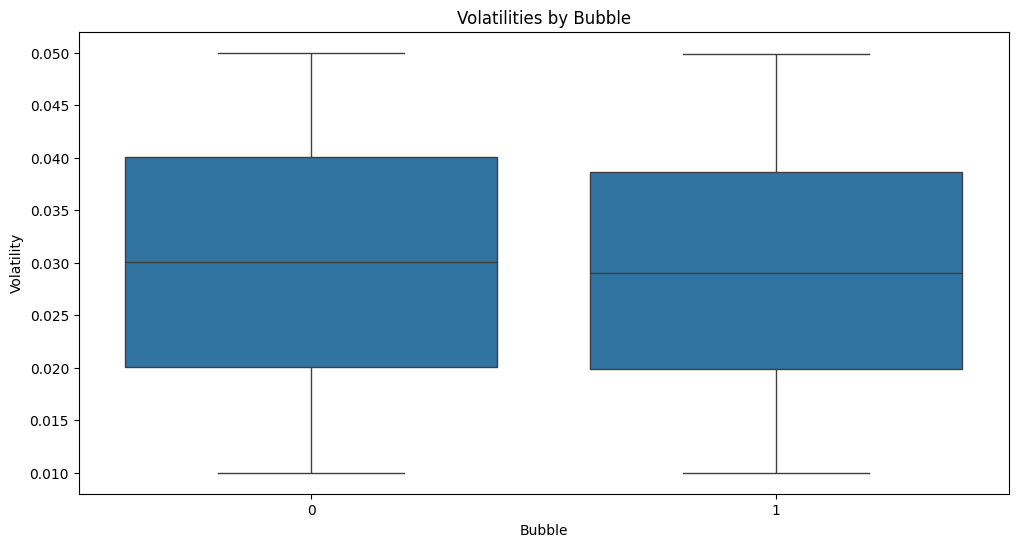

In [10]:
# Bubble vs non-bubble volatilities
plt.figure(figsize=(12, 6))
sns.boxplot(x='Bubble', y='Volatility', data=data)
plt.title('Volatilities by Bubble')
plt.show()

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten, Dropout, GRU
from tensorflow.keras.utils import to_categorical

# Load dataset
data = pd.read_csv('stock_market_bubble.csv')

# Encode categorical features
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].astype(int) // 10**9

# Scale numerical features
scaler = StandardScaler()
data[['Price', 'Volume', 'Volatility']] = scaler.fit_transform(data[['Price', 'Volume', 'Volatility']])

# Split data
X = data.drop('Bubble', axis=1)
y = data['Bubble']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Reshape for RNN and CNN
X_train_rnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# MLP Model
model_mlp = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_mlp.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 2s 3ms/step - loss: 31161082.0000 - accuracy: 0.8494 - val_loss: 8847159.0000 - val_accuracy: 0.9438
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 9124557.0000 - accuracy: 0.8850 - val_loss: 1051788.3750 - val_accuracy: 0.9438
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 3439626.5000 - accuracy: 0.8931 - val_loss: 195331.2969 - val_accuracy: 0.9438
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 1162470.3750 - accuracy: 0.9092 - val_loss: 32536.0000 - val_accuracy: 0.9438
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 556148.1875 - accuracy: 0.9075 - val_loss: 1345.7145 - val_accuracy: 0.9438
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 341473.1250 - accuracy: 0.9094 - val_loss: 1053.0027 - val_accuracy: 0.9438
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 201421.2969 

In [13]:
# RNN Model
model_rnn = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_rnn.shape[1], 1)),
    LSTM(50),
    Dense(1, activation='sigmoid')
])
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 [==============================] - 7s 16ms/step - loss: 0.2282 - accuracy: 0.9470 - val_loss: 0.2167 - val_accuracy: 0.9438
Epoch 2/50
200/200 [==============================] - 1s 6ms/step - loss: 0.2079 - accuracy: 0.9470 - val_loss: 0.2174 - val_accuracy: 0.9438
Epoch 3/50
200/200 [==============================] - 1s 7ms/step - loss: 0.2080 - accuracy: 0.9470 - val_loss: 0.2169 - val_accuracy: 0.9438
Epoch 4/50
200/200 [==============================] - 1s 6ms/step - loss: 0.2077 - accuracy: 0.9470 - val_loss: 0.2170 - val_accuracy: 0.9438
Epoch 5/50
200/200 [==============================] - 1s 6ms/step - loss: 0.2077 - accuracy: 0.9470 - val_loss: 0.2171 - val_accuracy: 0.9438
Epoch 6/50
200/200 [==============================] - 1s 6ms/step - loss: 0.2076 - accuracy: 0.9470 - val_loss: 0.2172 - val_accuracy: 0.9438
Epoch 7/50
200/200 [==============================] - 1s 6ms/step - loss: 0.2079 - accuracy: 0.9470 - val_loss: 0.2169 - val_accuracy: 0.9438
Epoch

In [16]:
# Evaluate models
mlp_loss, mlp_accuracy = model_mlp.evaluate(X_test, y_test)
rnn_loss, rnn_accuracy = model_rnn.evaluate(X_test_rnn, y_test)


print(f'MLP - Loss: {mlp_loss}, Accuracy: {mlp_accuracy}')
print(f'RNN - Loss: {rnn_loss}, Accuracy: {rnn_accuracy}')


63/63 [==============================] - 1s 6ms/step - loss: 0.2104 - accuracy: 0.9465
MLP - Loss: 0.20871227979660034, Accuracy: 0.9465000033378601
RNN - Loss: 0.21036720275878906, Accuracy: 0.9465000033378601
